In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Get the basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Get the summary statistics of the dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Display value count of target variable
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [8]:
# Percent breakdown of the Revenue rates
online_rate = df['Revenue'].value_counts()/df.shape[0]
print(online_rate)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


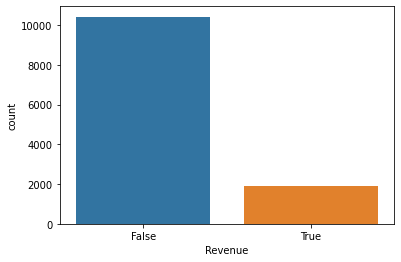

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='Revenue', data=df)
plt.show()

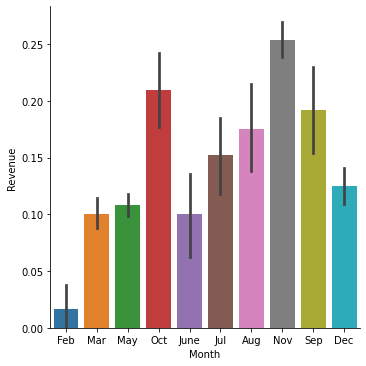

In [10]:
# Visualize the relationship between the categorical features and the target variable
sns.catplot(x='Month', y='Revenue', data=df, kind='bar')
plt.show()

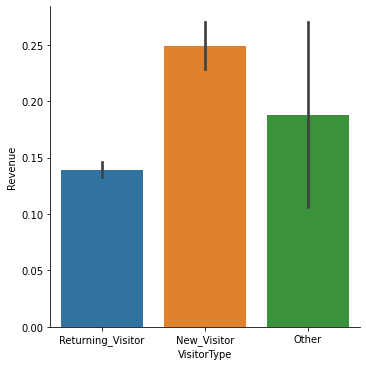

In [11]:
sns.catplot(x='VisitorType', y='Revenue', data=df, kind='bar')
plt.show()

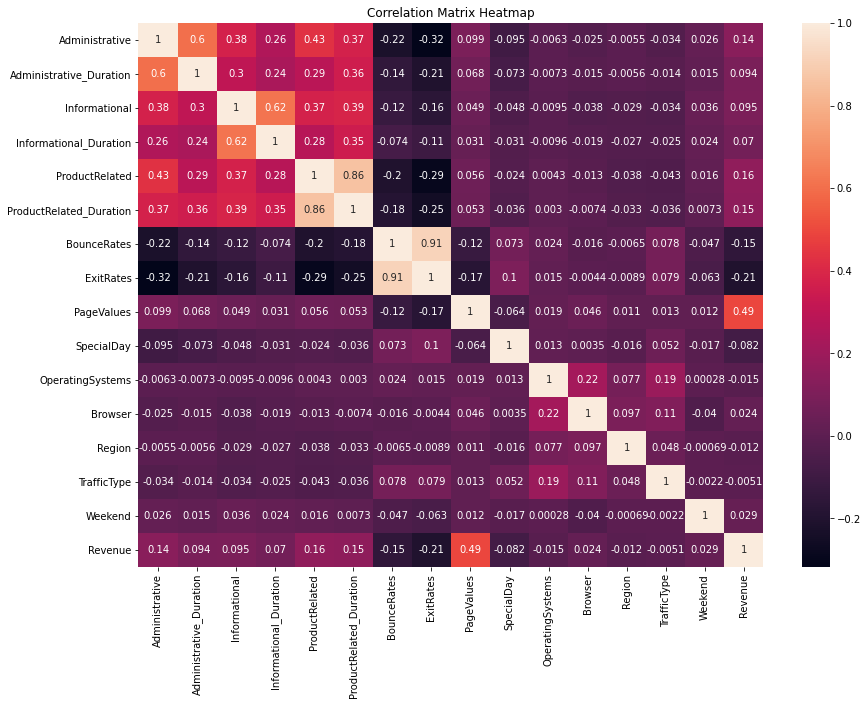

In [12]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

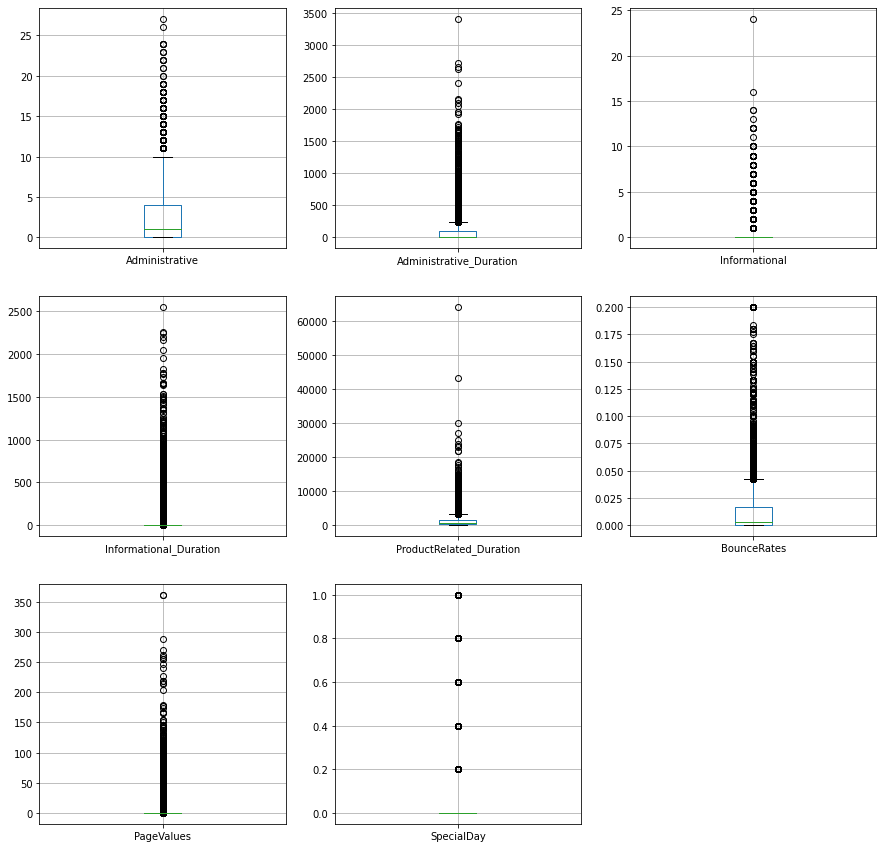

In [13]:
# box plots for detecting outliers
plt.figure(figsize=(15,15))
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    plt.subplot(3, 3, i)
    df.boxplot(col,whis=1.5)
    
plt.show()

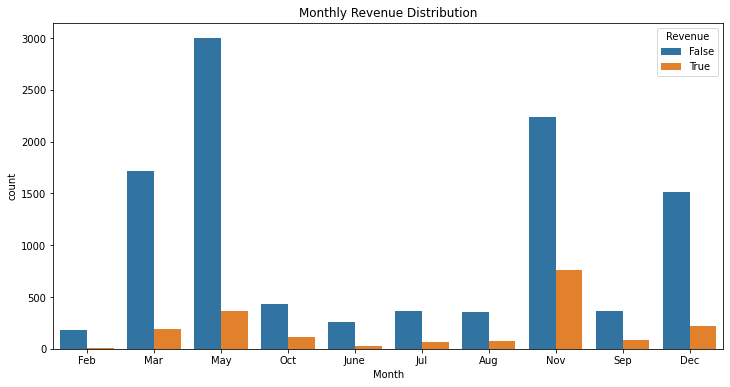

In [14]:
# Countplot for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=df)
plt.title('Monthly Revenue Distribution')
plt.show()

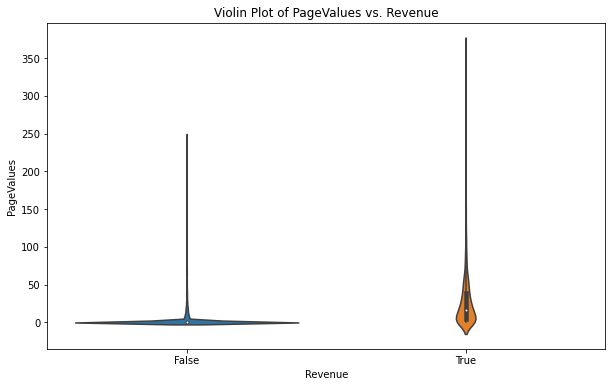

In [15]:
# Violin plot for 'PageValues' vs. 'Revenue'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Revenue', y='PageValues', data=df)
plt.title('Violin Plot of PageValues vs. Revenue')
plt.show()

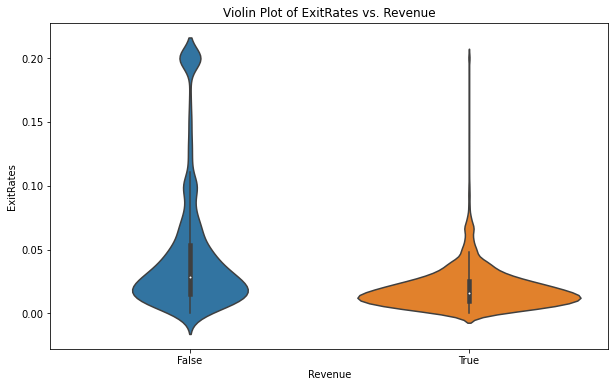

In [16]:
# Violin plot for 'ExitRates' vs. 'Revenue'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Revenue', y='ExitRates', data=df)
plt.title('Violin Plot of ExitRates vs. Revenue')
plt.show()

C:\Users\arnav\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


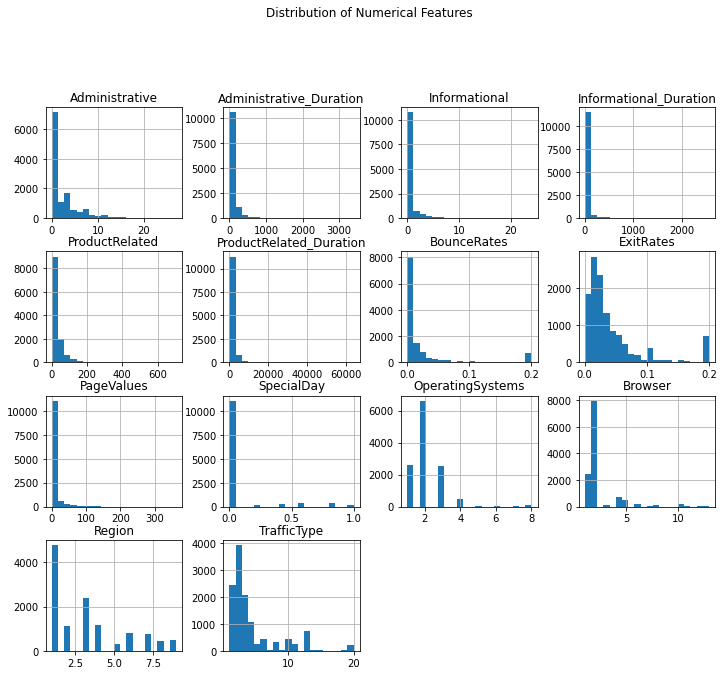

In [17]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

# Data Preprocessing and Train Test Split

In [18]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'], drop_first=True)

In [19]:
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [20]:
# Load libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Define features (X) and target variable (y)
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

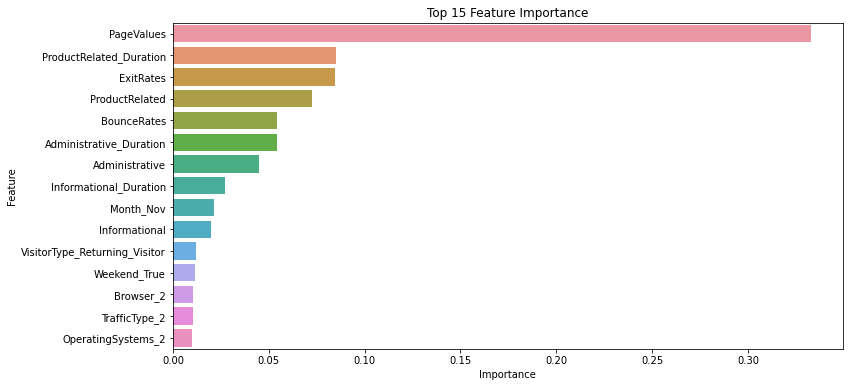

In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Select the top N features
top_n = 15
top_features = feature_importance_df.head(top_n)

# Plot feature importance for the top N features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top {top_n} Feature Importance')
plt.show()

In [22]:
# Standardize/Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Perform Cross-Validation to assess the model's generalization performance
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean F1-score:", cv_scores.mean())

Cross-Validation Scores: [0.60446247 0.61689587 0.67816092 0.5988024  0.60240964]
Mean F1-score: 0.6201462604424639


# Assessing different models

In [24]:
# Define classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [25]:
# Define preprocessor
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
# Define F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

In [27]:
# Evaluate each classifier
for classifier in classifiers:
    # Create pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Display classifier information
    print(f"\n{classifier.__class__.__name__}")
    
    # Model score on the test set
    model_score = pipe.score(X_test, y_test)
    print(f'Model score: {model_score:.3f}')

      # Display classification report for the test set
    y_pred = pipe.predict(X_test)
    results = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(results)
    
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))


LogisticRegression
Model score: 0.869

Confusion Matrix:
[[2006   49]
 [ 273  138]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2055
        True       0.74      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.81      0.66      0.69      2466
weighted avg       0.86      0.87      0.85      2466


DecisionTreeClassifier
Model score: 0.853

Confusion Matrix:
[[1875  180]
 [ 183  228]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2055
        True       0.56      0.55      0.56       411

    accuracy                           0.85      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466


RandomForestClassifier
Model score: 0.885

Confusion Matrix:
[[1969   86]
 [ 198  213]]

Classification Report:
           

C:\Users\arnav\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



XGBClassifier
Model score: 0.883

Confusion Matrix:
[[1955  100]
 [ 189  222]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      2055
        True       0.69      0.54      0.61       411

    accuracy                           0.88      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.87      0.88      0.88      2466



# Feature Engineering

In [28]:
X_train['PageValues_ProductRelated_Duration'] = X_train['PageValues'] * X_train['ProductRelated_Duration']
X_test['PageValues_ProductRelated_Duration'] = X_test['PageValues'] * X_test['ProductRelated_Duration']

<ipython-input-28-56901ab95228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PageValues_ProductRelated_Duration'] = X_train['PageValues'] * X_train['ProductRelated_Duration']
<ipython-input-28-56901ab95228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['PageValues_ProductRelated_Duration'] = X_test['PageValues'] * X_test['ProductRelated_Duration']


In [29]:
# Time Differences
X_train['Exit_Bounce_Time_Diff'] = X_train['ExitRates'] - X_train['BounceRates']
X_test['Exit_Bounce_Time_Diff'] = X_test['ExitRates'] - X_test['BounceRates']

# Time Ratios
X_train['Product_Info_Duration_Ratio'] = X_train['ProductRelated_Duration'] / (X_train['Informational_Duration'] + X_train['ProductRelated_Duration'] + 1)
X_test['Product_Info_Duration_Ratio'] = X_test['ProductRelated_Duration'] / (X_test['Informational_Duration'] + X_test['ProductRelated_Duration'] + 1)

<ipython-input-29-53fb0d257d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Exit_Bounce_Time_Diff'] = X_train['ExitRates'] - X_train['BounceRates']
<ipython-input-29-53fb0d257d7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Exit_Bounce_Time_Diff'] = X_test['ExitRates'] - X_test['BounceRates']
<ipython-input-29-53fb0d257d7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [30]:
# Domain-Specific Feature Interactions

# Revenue-Related Interactions
X_train['PageValues_Admin_Duration_Interact'] = X_train['PageValues'] * X_train['Administrative_Duration']
X_test['PageValues_Admin_Duration_Interact'] = X_test['PageValues'] * X_test['Administrative_Duration']

# Engagement Metrics
X_train['Product_Info_Duration_Ratio'] = X_train['ProductRelated'] * X_train['PageValues']
X_test['Product_Info_Duration_Ratio'] = X_test['ProductRelated'] * X_test['PageValues']


<ipython-input-30-0470abc8d11f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PageValues_Admin_Duration_Interact'] = X_train['PageValues'] * X_train['Administrative_Duration']
<ipython-input-30-0470abc8d11f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['PageValues_Admin_Duration_Interact'] = X_test['PageValues'] * X_test['Administrative_Duration']
<ipython-input-30-0470abc8d11f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [31]:
# Interaction pattern based on the sequence of visited pages
X_train['Sequential_Pattern'] = X_train['ProductRelated_Duration'] * X_train['ProductRelated']
X_test['Sequential_Pattern'] = X_test['ProductRelated_Duration'] * X_test['ProductRelated']

<ipython-input-31-72a5d9d3458a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sequential_Pattern'] = X_train['ProductRelated_Duration'] * X_train['ProductRelated']
<ipython-input-31-72a5d9d3458a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sequential_Pattern'] = X_test['ProductRelated_Duration'] * X_test['ProductRelated']


In [32]:
X_train['Triple_Interact'] = X_train['PageValues'] * X_train['ProductRelated_Duration'] * X_train['ExitRates']
X_test['Triple_Interact'] = X_test['PageValues'] * X_test['ProductRelated_Duration'] * X_test['ExitRates']

<ipython-input-32-37ef605287fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Triple_Interact'] = X_train['PageValues'] * X_train['ProductRelated_Duration'] * X_train['ExitRates']
<ipython-input-32-37ef605287fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Triple_Interact'] = X_test['PageValues'] * X_test['ProductRelated_Duration'] * X_test['ExitRates']


In [33]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,PageValues_ProductRelated_Duration,Exit_Bounce_Time_Diff,Product_Info_Duration_Ratio,PageValues_Admin_Duration_Interact,Sequential_Pattern,Triple_Interact
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,0,0,1,0,0.000000,0.047619,0.000000,0.000000,665.000000,0.000000
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,0,0,1,0,3993.514007,0.011464,224.337513,38.774385,116794.757628,55.641555
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,0,0,0,0,621.173920,0.018182,41.633641,409.675025,373.000000,11.294071
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,0,0,0,1,0.000000,0.001667,0.000000,0.000000,2511.000000,0.000000


In [34]:
# Define classifiers
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [35]:
# Define preprocessor
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [36]:
# Evaluate each classifier
for classifier in classifiers:
    # Create pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Display classifier information
    print(f"\n{classifier.__class__.__name__}")
    
    # Model score on the test set
    model_score = pipe.score(X_test, y_test)
    print(f'Model score: {model_score:.3f}')

      # Display classification report for the test set
    y_pred = pipe.predict(X_test)
    results = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:')
    print(results)
    
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))


RandomForestClassifier
Model score: 0.885

Confusion Matrix:
[[1970   85]
 [ 198  213]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2055
        True       0.71      0.52      0.60       411

    accuracy                           0.89      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466


GradientBoostingClassifier
Model score: 0.889

Confusion Matrix:
[[1971   84]
 [ 189  222]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

[21:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

C:\Users\arnav\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



XGBClassifier
Model score: 0.883

Confusion Matrix:
[[1955  100]
 [ 189  222]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      2055
        True       0.69      0.54      0.61       411

    accuracy                           0.88      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.87      0.88      0.88      2466



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [39]:
best_gb_classifier = GradientBoostingClassifier(**best_params)

In [40]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', best_gb_classifier)])

In [41]:
# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

In [42]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.73      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

